In [2]:
import os
import argparse
import itertools
import random
import math
import numpy as np
import pandas as pd
import tensorflow as tf

2023-03-30 16:28:56.345076: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
from collections import defaultdict
from collections import Counter

In [3]:
from DePTH import _utils

In [23]:
_utils

<module 'DePTH._utils' from '/Users/sliu/opt/anaconda3/envs/DePTH_test_030/lib/python3.9/site-packages/DePTH/_utils.py'>

In [24]:
hla_class = 'HLA_II'
data_dir = '../data/HLA_II_all_match/train_valid'
model_dir = 'temporary_folder'
enc_method = 'one_hot'
lr = 0.0001
n_dense = 2
n_units_str = '[64,16]'
dropout_flag = 'True'
p_dropout = 0.2
rseed = 5779
np_seed = 7821
tf_seed = 6367

In [25]:
random.seed(rseed)
np.random.seed(np_seed)
tf.random.set_seed(tf_seed)

In [26]:
patience = 10

dropout_flag = (dropout_flag == 'True')

In [27]:
dropout_flag

True

In [28]:
len_n_units_str = len(n_units_str)
n_units_str_input = n_units_str[1:(len_n_units_str - 1)].split(',')
n_units = [int(i) for i in n_units_str_input]

In [29]:
n_units

[64, 16]

In [30]:
print("n_units = ", n_units)

n_units =  [64, 16]


In [31]:
len(n_units)

2

In [32]:
n_dense

2

In [33]:
print("data_dir = ", data_dir)
print("model_dir = ", model_dir)
print("enc_method = ", enc_method)
print("lr = ", lr)
print("n_dense = ", n_dense)
print("n_units = ", n_units)
print("dropout_flag = ", dropout_flag)
print("p_dropout = ", p_dropout)

data_dir =  ../data/HLA_II_all_match/train_valid
model_dir =  temporary_folder
enc_method =  one_hot
lr =  0.0001
n_dense =  2
n_units =  [64, 16]
dropout_flag =  True
p_dropout =  0.2


In [34]:
setting_name = \
    enc_method + '_' + str(lr)[2:] + \
    '_dense' + str(n_dense) + \
    '_n_units_' + '_'.join([str(n) for n in n_units]) + \
    ('_dropout_p_' + str(p_dropout)[2:]) * int(dropout_flag)

In [35]:
setting_name

'one_hot_0001_dense2_n_units_64_16_dropout_p_2'

In [36]:
print(setting_name)

one_hot_0001_dense2_n_units_64_16_dropout_p_2


In [37]:
checkpoint_path = model_dir

In [38]:
(((HLA_encoded_train, CDR3_encoded_train, CDR3_len_train,
  cdr1_encoded_train, cdr2_encoded_train, cdr25_encoded_train),
  y2_train, n_pos_train, n_neg_train),
 ((HLA_encoded_valid, CDR3_encoded_valid, CDR3_len_valid,
  cdr1_encoded_valid, cdr2_encoded_valid, cdr25_encoded_valid),
  y2_valid, n_pos_valid, n_neg_valid)) = \
    _utils.get_data(hla_class, data_dir, enc_method, False)

print(HLA_encoded_train.shape)
print(HLA_encoded_valid.shape)
print(CDR3_encoded_train.shape)
print(CDR3_len_train.shape)
print(cdr1_encoded_train.shape)
print(cdr2_encoded_train.shape)
print(cdr25_encoded_train.shape)
print(y2_train.shape)

(39732, 45, 21)
(13242, 45, 21)
(39732, 27, 21)
(39732, 27)
(39732, 12, 22)
(39732, 10, 22)
(39732, 6, 21)
(39732, 1)


In [39]:
model = _utils.get_model(HLA_shape=HLA_encoded_train.shape[1:],
                   CDR3_shape=CDR3_encoded_train.shape[1:],
                   len_shape=CDR3_len_train.shape[1:],
                   cdr1_shape=cdr1_encoded_train.shape[1:],
                   cdr2_shape=cdr2_encoded_train.shape[1:],
                   cdr25_shape=cdr25_encoded_train.shape[1:],
                   n_dense=n_dense,
                   n_units=n_units,
                   dropout_flag=dropout_flag,
                   p_dropout=p_dropout)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 CDR3 (InputLayer)              [(None, 27, 21)]     0           []                               
                                                                                                  
 CDR3_conv (Conv1D)             (None, 26, 8)        344         ['CDR3[0][0]']                   
                                                                                                  
 CDR3_maxpooling (MaxPooling1D)  (None, 25, 8)       0           ['CDR3_conv[0][0]']              
                                                                                                  
 CDR3_flatten (Flatten)         (None, 200)          0           ['CDR3_maxpooling[0][0]']        
                                                                                              

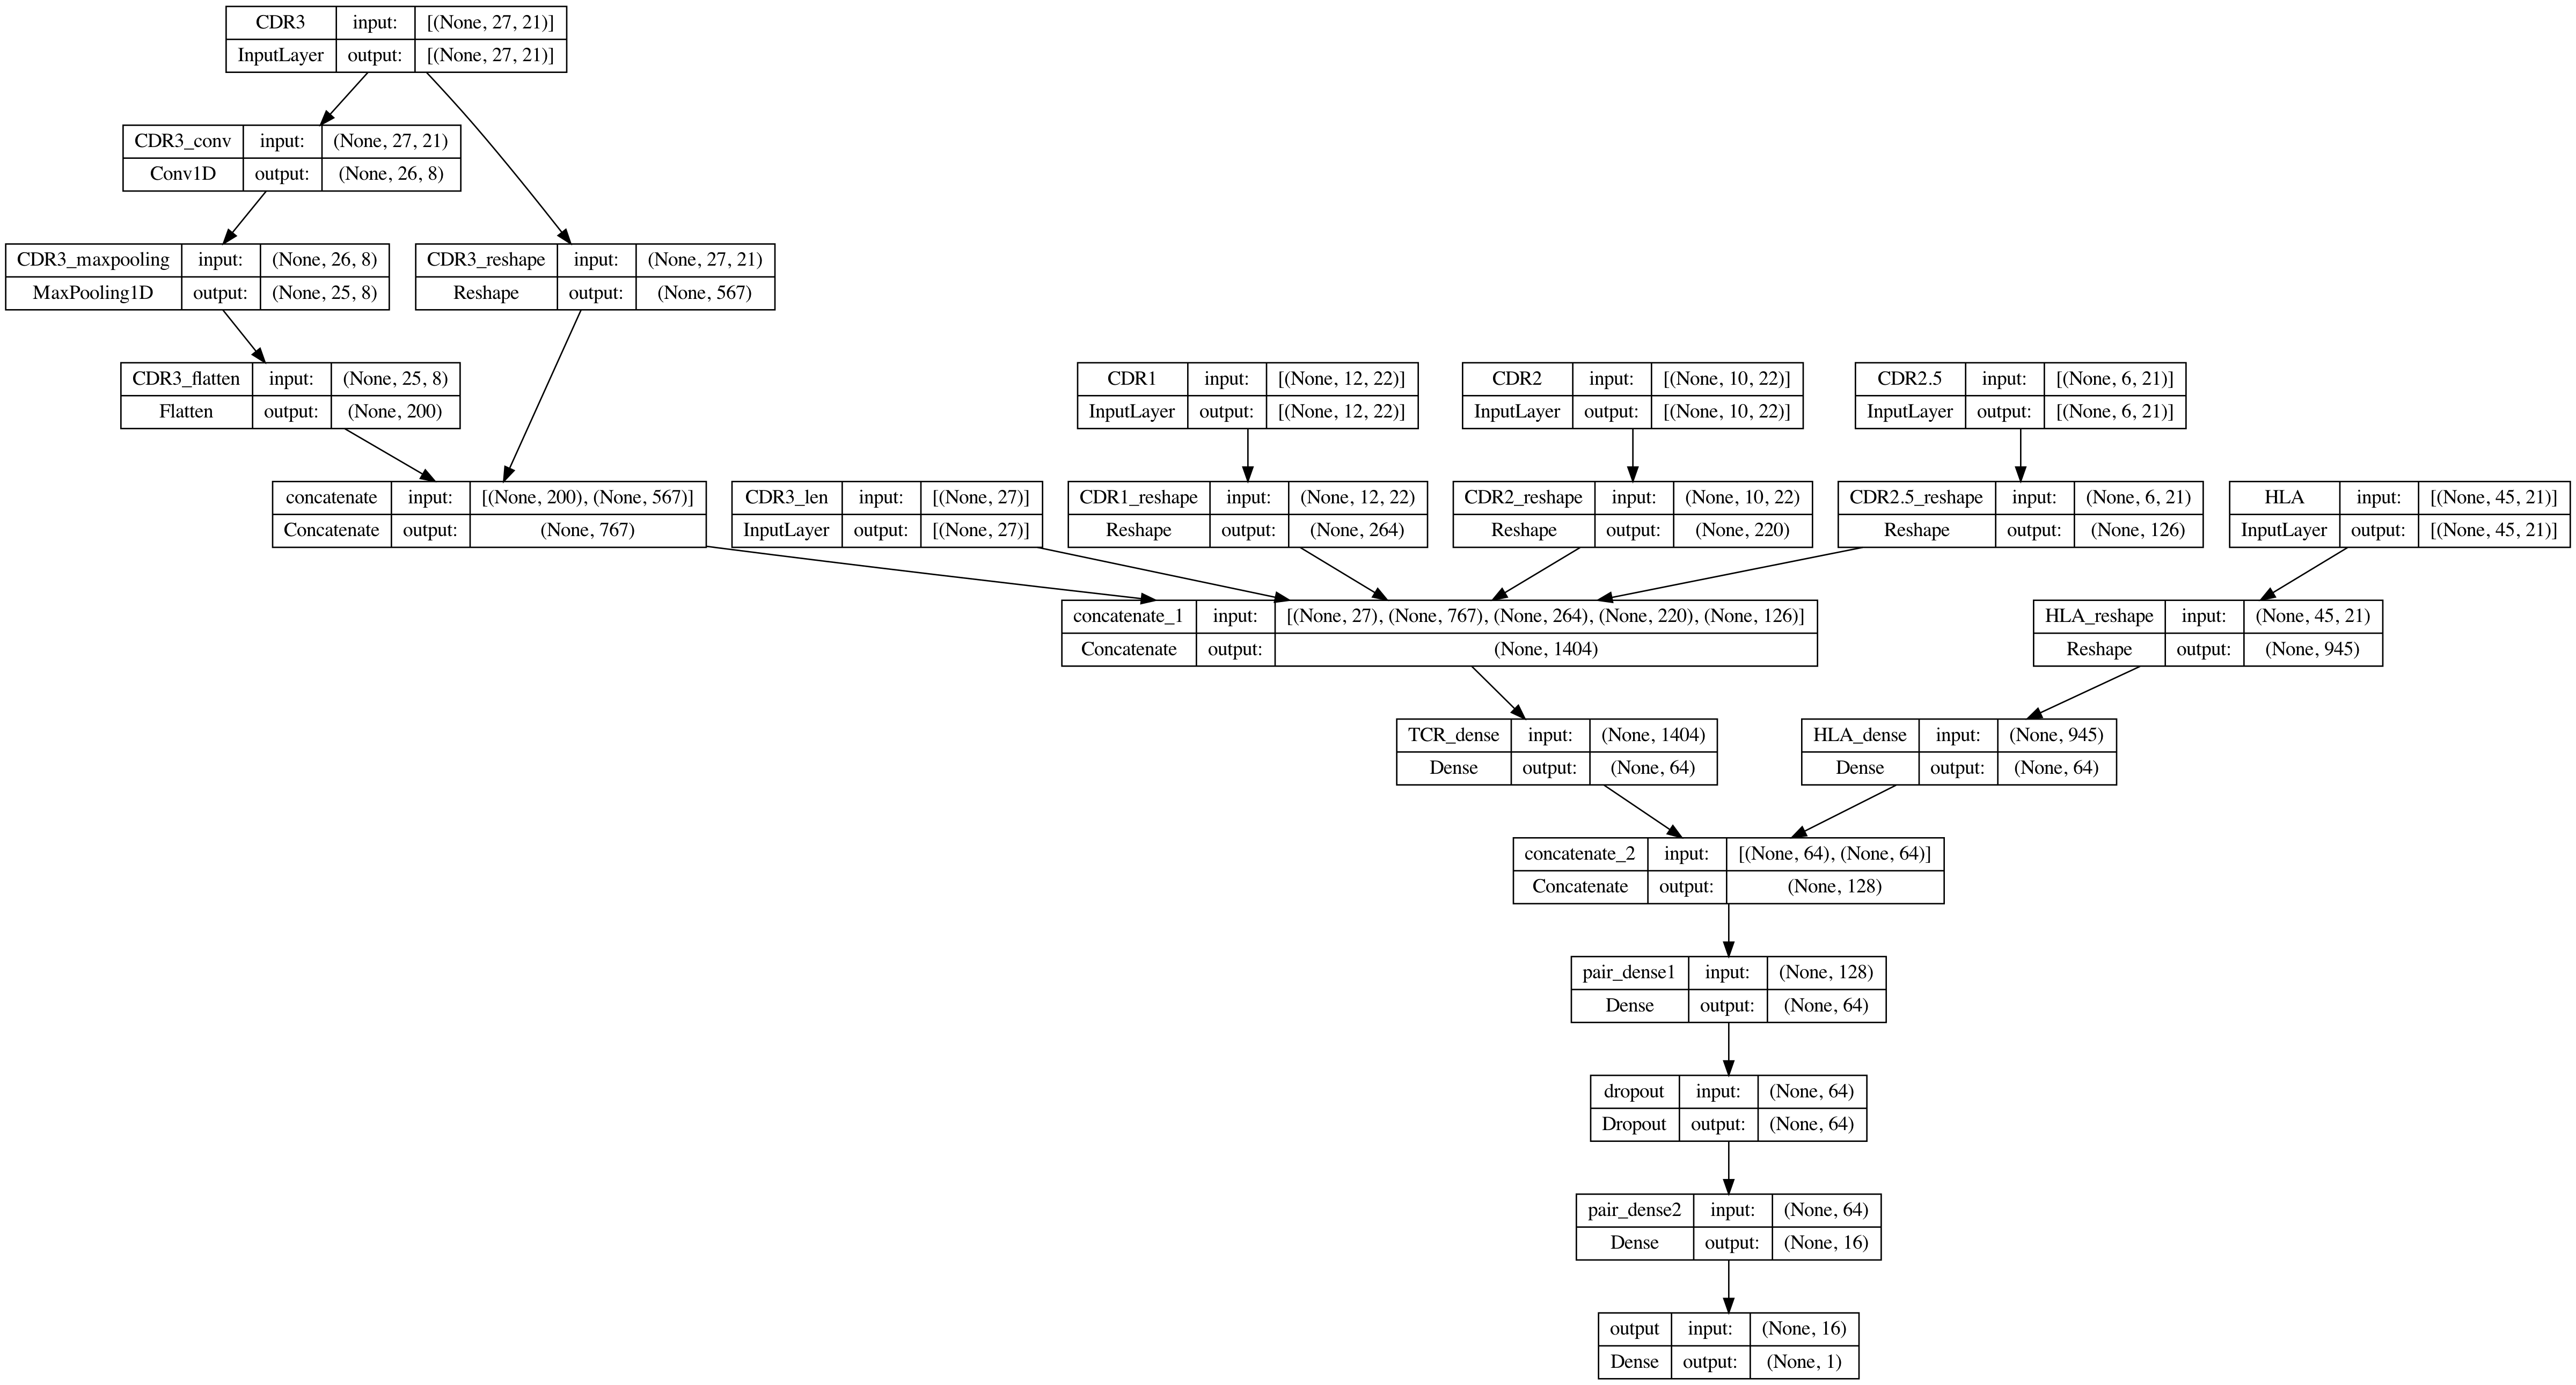

In [40]:
tf.keras.utils.plot_model(
    model,
    to_file='../figures/depth_draft/supp6_hla_ii_model_plot_w_size.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=192,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)